In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/g-research-crypto-forecasting/example_sample_submission.csv
/kaggle/input/g-research-crypto-forecasting/asset_details.csv
/kaggle/input/g-research-crypto-forecasting/example_test.csv
/kaggle/input/g-research-crypto-forecasting/train.csv
/kaggle/input/g-research-crypto-forecasting/supplemental_train.csv
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/__init__.py


In [2]:
data = pd.read_csv("../input/g-research-crypto-forecasting/train.csv")
data_details= pd.read_csv("../input/g-research-crypto-forecasting/asset_details.csv")


In [3]:
data_details.head(14)


,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [4]:
!pip -q install mplfinance

In [5]:
import mplfinance as mpf

In [6]:
mapping = dict(data_details[['Asset_ID', 'Asset_Name']].values)
data['Asset Name'] = data['Asset_ID'].map(mapping)
data.head()


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset Name
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,Bitcoin Cash
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,Binance Coin
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,Bitcoin
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,EOS.IO
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,Ethereum Classic


## ASSET ID 2- BITCOIN CASH

In [7]:
bitcoin_cash= data.query('Asset_ID == 2').reset_index(drop= True) 
bitcoin_cash['timestamp'] = pd.to_datetime(bitcoin_cash['timestamp'], unit = 's')
bitcoin_cash = bitcoin_cash.set_index('timestamp')

In [8]:
bitcoin_cash

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset Name
timestamp,,,,,,,,,,
2018-01-01 00:01:00,2,40.0,2376.580000,2399.50,2357.14,2374.590000,19.233005,2373.116392,-0.004218,Bitcoin Cash
2018-01-01 00:02:00,2,53.0,2374.553333,2400.90,2354.20,2372.286667,24.050259,2371.434498,-0.004079,Bitcoin Cash
2018-01-01 00:03:00,2,61.0,2371.633333,2401.90,2353.70,2372.063333,42.676438,2375.442755,-0.002892,Bitcoin Cash
2018-01-01 00:04:00,2,95.0,2376.060000,2406.40,2344.00,2370.566667,37.820918,2371.096152,-0.003718,Bitcoin Cash
2018-01-01 00:05:00,2,33.0,2372.656667,2404.60,2343.40,2370.173333,8.519679,2370.345730,-0.002171,Bitcoin Cash
...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,2,88.0,543.044000,543.19,541.01,541.902000,106.161073,542.316880,NaN,Bitcoin Cash
2021-09-20 23:57:00,2,178.0,540.526000,541.05,538.09,538.690000,124.443244,539.361180,NaN,Bitcoin Cash
2021-09-20 23:58:00,2,100.0,538.640000,539.24,538.00,538.775000,49.333529,538.611258,NaN,Bitcoin Cash


In [9]:
whole = bitcoin_cash.loc['2021-09-20 22:56:00': '2021-09-21 00:00:00']

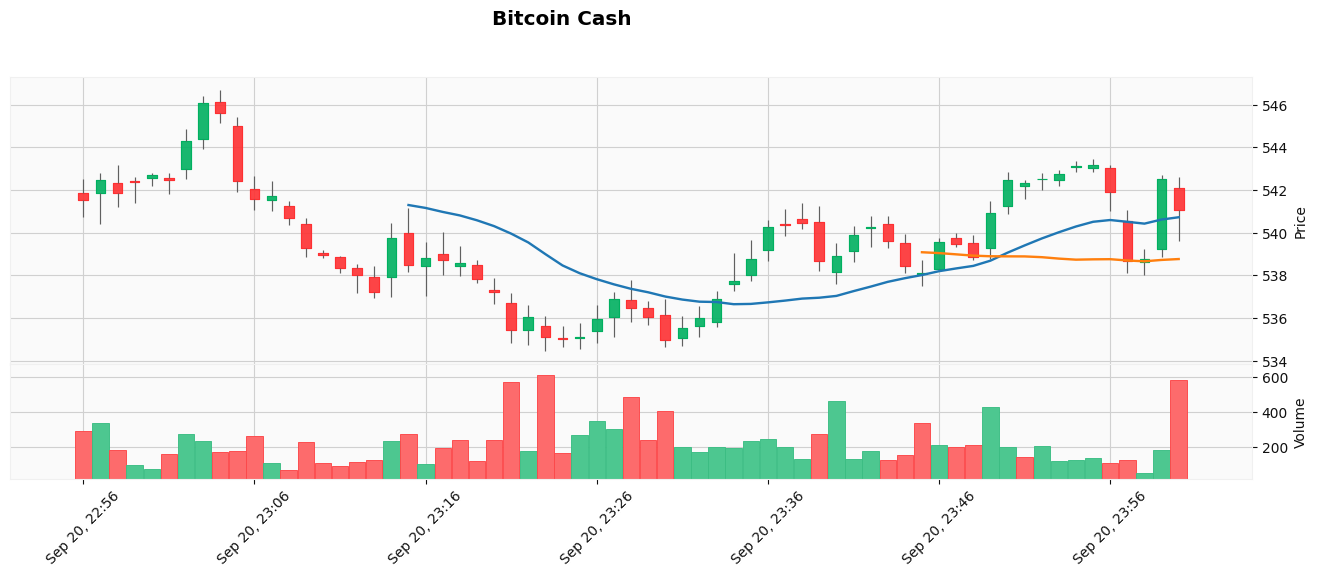

In [10]:
mpf.plot(
    whole,
    type='candle',
    volume = True,
    mav=(20,50,200),
    figratio=(3,1),
    style='yahoo',
    title='Bitcoin Cash'
)

In [11]:
!pip -q install yfinance

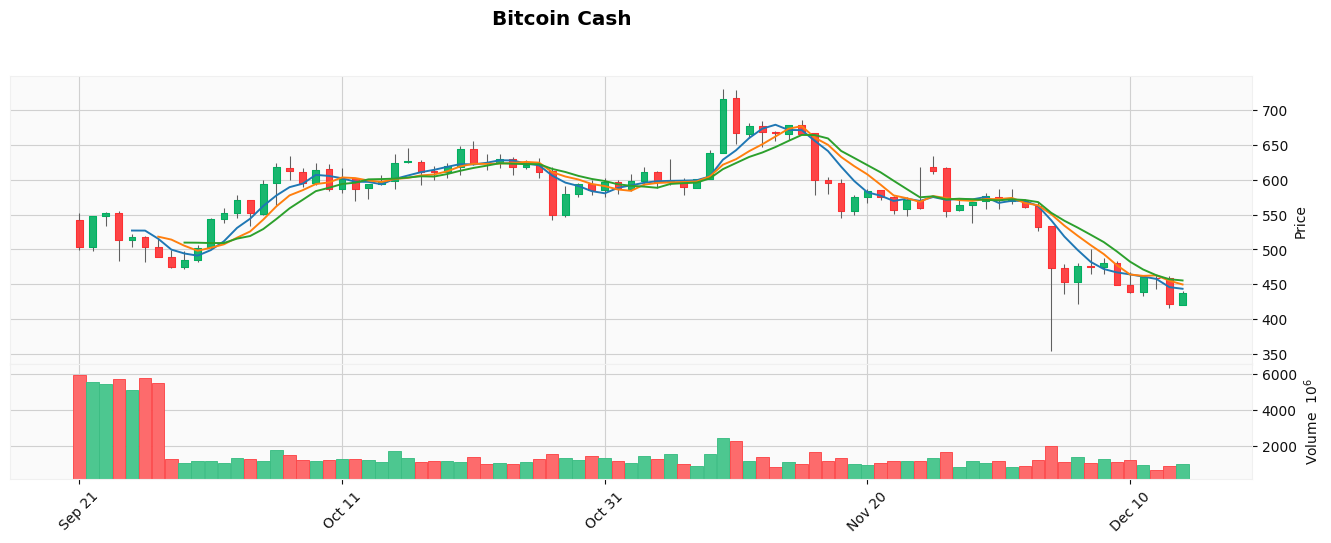

In [12]:
import yfinance as yf

bitcoin_cash_now = yf.Ticker('BCH-USD')

bitcoin_cash_now_values = bitcoin_cash_now.history(start='2021-09-21')

mpf.plot(
    bitcoin_cash_now_values,
    type='candle',
    volume = True,
    mav=(5,7,9),
    figratio=(3,1),
    style='yahoo',
    title='Bitcoin Cash'
)

## ASSET ID 3 - Cardano

In [13]:
cardano = data.query('Asset_ID == 3').reset_index(drop= True) 
cardano['timestamp'] = pd.to_datetime(cardano['timestamp'], unit = 's')
cardano = cardano.set_index('timestamp')

In [14]:
cardano

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Asset Name
timestamp,,,,,,,,,,
2018-04-17 09:11:00,3,16.0,0.260000,0.260990,0.260000,0.260000,32230.832200,0.260200,-0.004612,Cardano
2018-04-17 09:12:00,3,28.0,0.260000,0.260990,0.259852,0.260000,18711.228600,0.260037,0.000387,Cardano
2018-04-17 09:13:00,3,9.0,0.260000,0.260000,0.258700,0.258700,6831.405700,0.259515,-0.005415,Cardano
2018-04-17 09:14:00,3,5.0,0.259999,0.259999,0.259870,0.259998,4414.874062,0.259884,-0.005415,Cardano
2018-04-17 09:15:00,3,9.0,0.259997,0.259997,0.259000,0.259997,10797.813800,0.259997,0.000385,Cardano
...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,3,1388.0,2.083244,2.084400,2.063800,2.067367,718089.514189,2.072282,NaN,Cardano
2021-09-20 23:57:00,3,758.0,2.067776,2.071188,2.064000,2.066106,380634.009697,2.067684,NaN,Cardano
2021-09-20 23:58:00,3,855.0,2.065735,2.068002,2.061000,2.064901,392212.248603,2.065272,NaN,Cardano


In [15]:
whole1 = cardano.loc['2021-09-20 20:56:00': '2021-09-21 00:00:00']

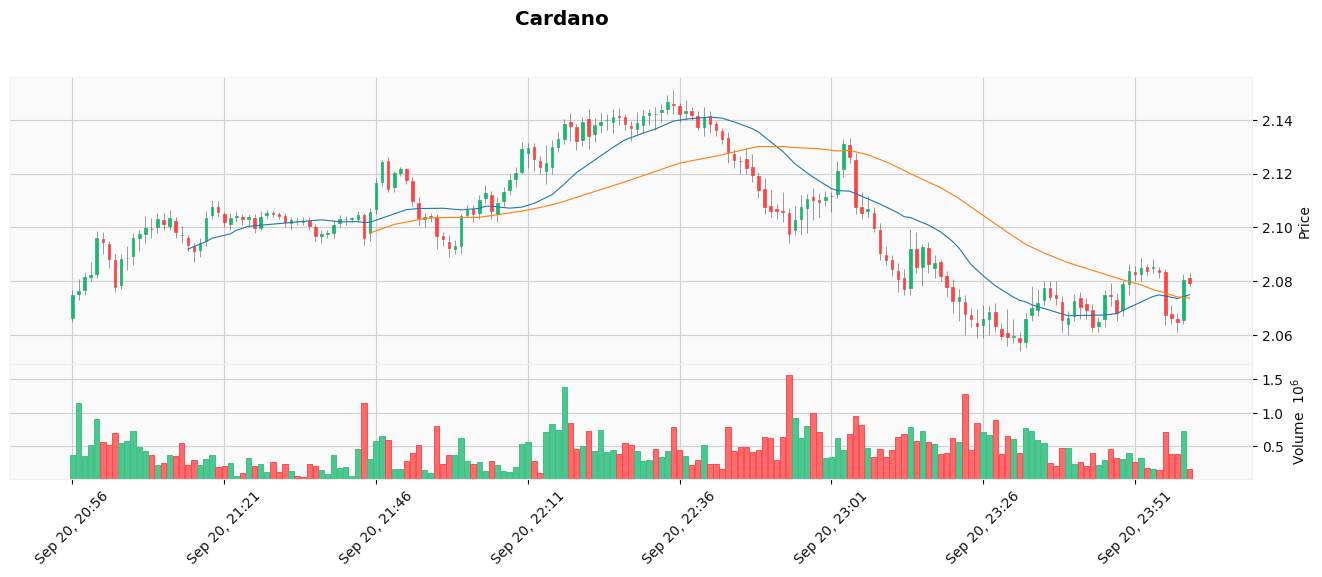

In [16]:
mpf.plot(
    whole1,
    type='candle',
    volume = True,
    mav=(20,50,200),
    figratio=(3,1),
    style='yahoo',
    title='Cardano'
)

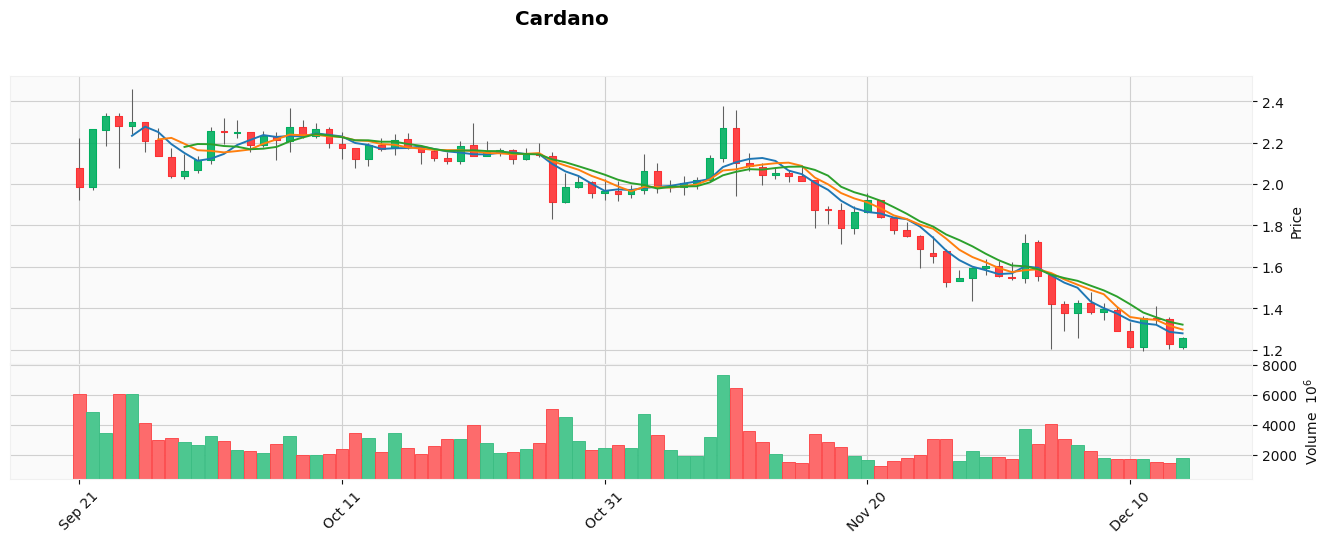

In [17]:
cardano_now = yf.Ticker('ADA-USD')

cardano_now_values = cardano_now.history(start='2021-09-21')

mpf.plot(
    cardano_now_values,
    type='candle',
    volume = True,
    mav=(5,7,9),
    figratio=(3,1),
    style='yahoo',
    title='Cardano'
)